# Microphone Compensation Filter

The microphone of AudioMoth is the [SPM0408LE5H‐TB](https://media.digikey.com/pdf/Data%20Sheets/Knowles%20Acoustics%20PDFs/SPM0408LE5H-TB.pdf) from Knowles Acoustics. Its frequency response is showed in the datasheet [1]:

![alt text](mic_frequency_response.png)

Note that the frequency response is almost flat between 400 Hz and 4000 KHz. See also that there is not more information about the frequency response for frequencys below to 100 Hz and above to 10 Khz. 

For now, we implement an IIR filter in order to compensate the microphone response at low frequencies. In the near future, we are going to make an experiment to evaluate the real microphone frequency response. 

## IIR filter design

From the information of the previous graph, we design a second order IIR highpass filter. We select two poles and two zeros close to the unit circle. For instance, for a sampling rate of 48 kHz:

In [11]:
fs = 48000

rp = 0.999
rz = 0.993

poles = [rp,rp]
zeros = [rz,rz]

We find $r_p$ and $r_z$ to accomplish that the filter has aprox +2dB response at 100 Hz and 0dB at 1000 Khz

We find the filter gain, $G$ and the $b$ and $a$ coefficients:

In [12]:
import numpy as np

a = np.poly(poles)
b = np.poly(zeros)

To find, the filter frequency response, we find the output when the input is the impulse, $\delta[n]$:

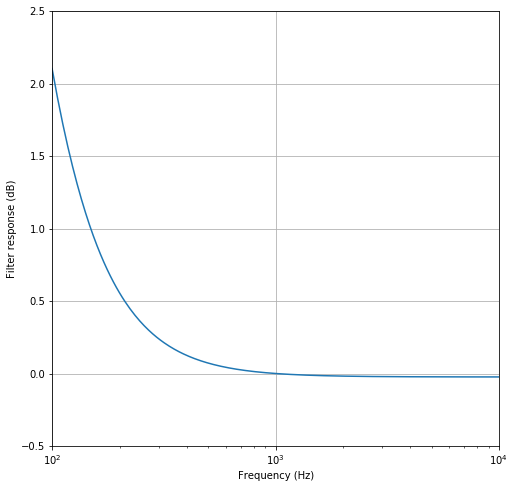

In [13]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter

N = 8192
delta = np.zeros(N)
delta[0] = 1

h = lfilter(b,a,delta)
H = np.fft.fft(h)[:int(N/2)+1]

freqs = np.linspace(0,fs/2,N/2+1)

ix_1k = np.argmin((freqs-1000)**2)

fig = plt.figure(figsize=(8,8))
plt.plot(freqs,20*np.log10(np.abs(H))-20*np.log10(np.abs(H[ix_1k])))
plt.xscale('log')
plt.xlim([100,10000])
plt.ylim([-0.5,2.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter response (dB)')
plt.grid()
plt.show()

For all the oher sampling rates:

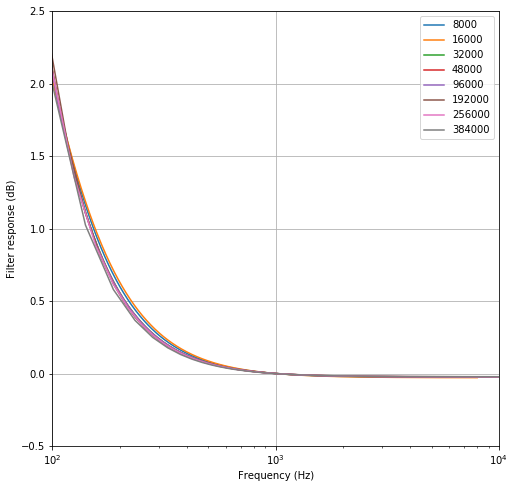

In [14]:
fs_list = [8000,16000,32000,48000,96000,192000,256000,384000]
rp_list = [0.97,0.98,0.998,0.999,0.999,0.9995,0.9995,0.9996]
rz_list = [0.948,0.97,0.9895,0.993,0.9964,0.9979,0.9985,0.99895]
G = np.zeros(len(fs_list))

fig = plt.figure(figsize=(8,8))

for j in range(len(fs_list)):
    fs = fs_list[j]
    poles = [rp_list[j]]*2
    zeros = [rz_list[j]]*2
    a = np.poly(poles)
    b = np.poly(zeros)
    
    h = lfilter(b,a,delta)
    H = np.fft.fft(h)[:int(N/2)+1]
    
    freqs = np.linspace(0,fs/2,N/2+1)
    ix_1k = np.argmin((freqs-1000)**2)
    plt.plot(freqs,20*np.log10(np.abs(H)) - 20*np.log10(np.abs(H[ix_1k])),label=str(fs))
    
    G[j] = 1/np.abs(H[ix_1k])
    
plt.legend()
plt.xscale('log')
plt.xlim([100,10000])
plt.ylim([-0.5,2.5])
plt.title('IIR filter frequency response ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter response (dB)')
plt.grid()
plt.show()

## References

[1] [SPM0408LE5H‐TB](https://media.digikey.com/pdf/Data%20Sheets/Knowles%20Acoustics%20PDFs/SPM0408LE5H-TB.pdf) datasheet. Knowles Acoustics. Acces 02/19/2020.